In [1]:
%load_ext autoreload
%autoreload 2
# %cd /p/mmcardiac/Jerry/code/CINE-DENSE-Translation
%cd /home/jx8fh/Projects/LaMoD
import numpy as np
import torch
import matplotlib.pyplot as plt
from pathlib import Path
from modules.data import check_dict

/sfs/gpfs/tardis/home/jx8fh/Projects/LaMoD


In [2]:
# showcase data indices
DENSE_showcase_indices = [85, 1]
DENSE_showcase_data_fnames = [
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-085-UVA_05192021-76.npy',
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-001-033-86.npy'
]
DENSE_showcase_data_skipdiffusion_fnames = [
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-SkipDiffusion-085-UVA_05192021-76.npy',
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/DENSE/LaMoD-DENSE-SkipDiffusion-001-033-86.npy'
]
DENSE_showcase_ES_frame = [22, 24]
cine_showcase_indices = [86, 74]
cine_showcase_data_fnames = [
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-086-UVA04--36.npy',
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-074-124-47.npy'
]
# cine_showcase_ES_frame = [22, 24]
cine_showcase_data_skipdiffusion_fnames = [
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-SkipDiffusion-086-UVA04--36.npy',
    '/scratch/jx8fh/2025-01-04-LaMoD-variability/cine/LaMoD-cine-SkipDiffusion-074-124-47.npy'
]

In [3]:
# Load data
DENSE_showcase_data_preds = [np.load(fname, allow_pickle=True).tolist() for fname in DENSE_showcase_data_fnames]
DENSE_showcase_data_skipdiffusion_preds = [np.load(fname, allow_pickle=True).tolist() for fname in DENSE_showcase_data_skipdiffusion_fnames]
cine_showcase_data_preds = [np.load(fname, allow_pickle=True).tolist() for fname in cine_showcase_data_fnames]
cine_showcase_data_skipdiffusion_preds = [np.load(fname, allow_pickle=True).tolist() for fname in cine_showcase_data_skipdiffusion_fnames]

In [4]:
segment_names = [
    'Inferoseptal',
    'Inferior',
    'Inferolateral',
    'Anterolateral',
    'Anterior',
    'Anteroseptal'
]

In [8]:
strain_prev_filename = '/scratch/jx8fh/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_prev_data = np.load(strain_prev_filename, allow_pickle=True).tolist()
check_dict(strain_prev_data)

MotionDecoder1x1                                             dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetROri                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
UNetR1x1                                                     dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
StrainNet                                                    dict_keys(['strain_img_MSE_errors',

In [44]:
check_dict(strain_prev_data['MotionDecoder1x1'])

strain_img_MSE_errors                                        list: (102)         
strain_img_L1_errors                                         list: (102)         
strain_mat_MSE_errors                                        list: (102)         
strain_mat_L1_errors                                         list: (102)         
DENSE_strain_CC_pred                                         list: (102)         
DENSE_strain_segmental_pred                                  list: (102)         


In [52]:
len(strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'])

102

In [51]:
check_dict(strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'][0])

origin                                                       (2,)                
insertion                                                    (2,)                
CCs4                                                         (4, 40)             
CCs6                                                         (6, 40)             
CCs18                                                        (18, 40)            
Seg4                                                         dict_keys(['insertion_shifted', 'BasisNames', 'BasisID', 'SegmentID'])
Seg6                                                         dict_keys(['insertion_shifted', 'BasisNames', 'BasisID', 'SegmentID'])
Seg18                                                        dict_keys(['insertion_shifted', 'BasisNames', 'BasisID', 'SegmentID'])


In [10]:
len(strain_prev_data['MotionDecoder1x1']['strain_img_MSE_errors'])

102

In [31]:
# strain_transUNet_filename = '/p/mmcardiac/Jerry/code/CINE-DENSE-Translation/review/2024-04/2024-04-24-whole-vol-preds/2024-04-24-whole-vol-preds-strain-and-errors.npy'
strain_transUNet_filename = '/scratch/jx8fh/2024-06-22-whole-vol-preds-strain-and-errors-TransUNet.npy'
strain_transUNet_data = np.load(strain_transUNet_filename, allow_pickle=True).tolist()
check_dict(strain_transUNet_data)

TransUNetOri                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])
TransUNet1x1                                                 dict_keys(['strain_img_MSE_errors', 'strain_img_L1_errors', 'strain_mat_MSE_errors', 'strain_mat_L1_errors', 'DENSE_strain_CC_pred', 'DENSE_strain_segmental_pred'])


In [72]:
test_GT_data = np.load('/scratch/jx8fh/2024-04-16-test-data.npy', allow_pickle=True).tolist()
check_dict(test_GT_data[0])

patient_id                                                   033                 
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
DENSE_slice_location                                         76.947609505431     
DENSE_frame_time_stamps                                      (51,)               
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_myo_masks                                              (48, 48, 51)        
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_myo_masks_rescaled                                     (128, 128, 51)      
DENSE_n_frames_all                                           51                  
DENSE_frame_indices_with_myo_contour                         (51,)               
out_of_box_flag        

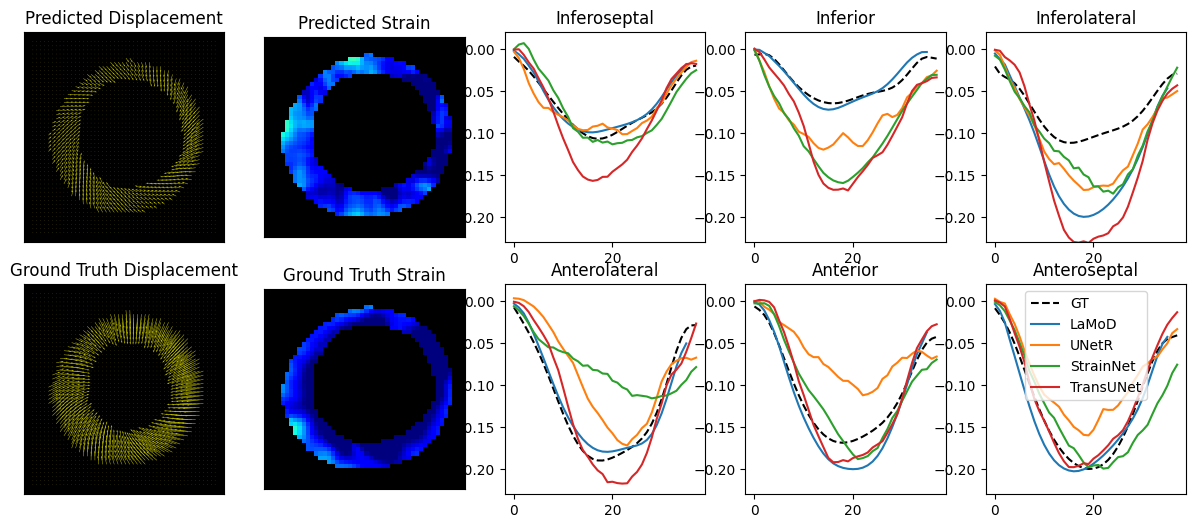

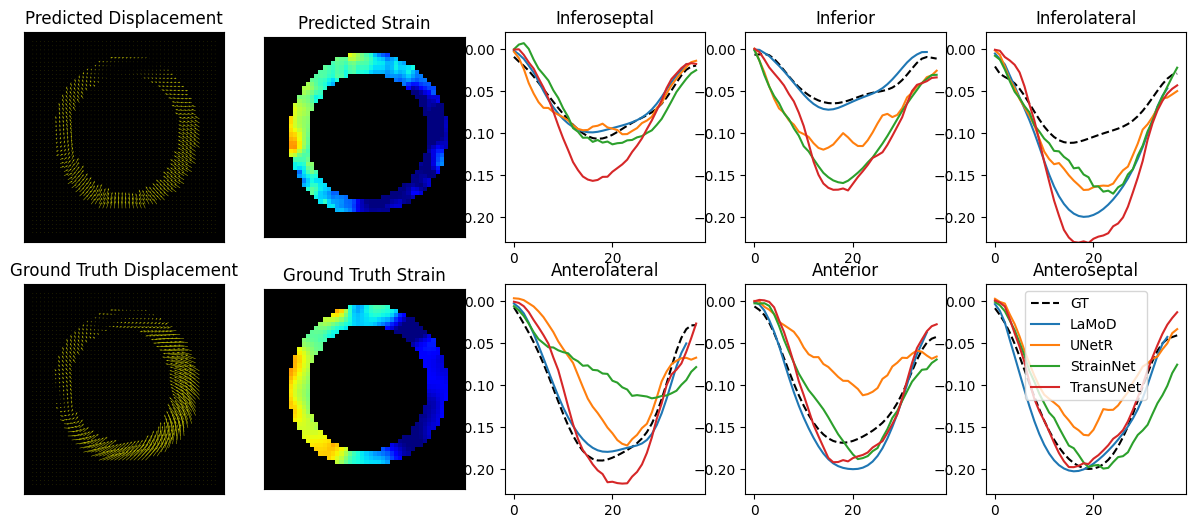

In [79]:
for preds_idx, preds in enumerate(DENSE_showcase_data_preds):
    pred_disps = [datum['disp_pred']*1.5 for datum in preds]
    pred_disp_skipdiffusion = [datum['disp_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_disps = [datum['disp_GT'][...,:-1] for datum in preds]

    # datum_patient_id = test_DENSE_data[check_datum_idx]['patient_id']
    datum_ES_frame = DENSE_showcase_ES_frame[preds_idx]
    # datum_ES_time = test_DENSE_data[check_datum_idx]['DENSE_frame_time_stamps'][datum_ES_frame]
    

    pred_disps_mean_X = np.mean([disp[0] for disp in pred_disps], axis=0)#*1.5
    pred_disps_mean_Y = np.mean([disp[1] for disp in pred_disps], axis=0)#*1.5

    pred_strains = [datum['strain_pred']*1.5 for datum in preds]
    pred_strain_mean = np.mean([strain for strain in pred_strains], axis=0)
    # pred_strain_mean = preds[0]['strain_pred']*1.5
    pred_strain_skipdiffusion = [datum['strain_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_strain = preds[0]['strain_GT']

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    # Predicted Displacements Field
    axs[0,0].quiver(
        pred_disps_mean_X[...,10], 
        pred_disps_mean_Y[...,10], 
        color='y', 
        scale=1,
        scale_units='xy')
    axs[0,0].set_title('Predicted Displacement')
    axs[0,0].set_facecolor('black')
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])

    # GT Displacements Field
    axs[1,0].quiver(
        gt_disps[0][0,...,datum_ES_frame],
        gt_disps[0][1,...,datum_ES_frame],
        color='y',
        scale=1,
        scale_units='xy')
    axs[1,0].set_title('Ground Truth Displacement')
    axs[1,0].set_facecolor('black')
    axs[1,0].set_xticks([])
    axs[1,0].set_yticks([])

    # Predicted Strain Image
    axs[0,1].imshow(pred_strain_mean[...,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    # axs[0,1].imshow(pred_strain_skipdiffusion[...,10], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0,1].set_title('Predicted Strain')
    axs[0,1].set_facecolor('black')
    axs[0,1].invert_yaxis()
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    # colorbar
    # cbar = fig.colorbar(axs[0,1].images[0], ax=axs[0,1])
    # cbar.set_label('Strain')

    # GT Strain Image
    axs[1,1].imshow(gt_strain[...,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[1,1].set_title('Ground Truth Strain')
    axs[1,1].set_facecolor('black')
    axs[1,1].invert_yaxis()
    axs[1,1].set_xticks([])
    axs[1,1].set_yticks([])
    # colorbar
    # cbar = fig.colorbar(axs[1,1].images[0], ax=axs[1,1])
    # cbar.set_label('Strain')

    # Strain curves
    n_sectors = 6
    # fig, axs = plt.subplots(2, n_sectors, figsize=(n_sectors*2, 5))
    # curr_DENSE_idx = DENSE_showcase_indices[preds_idx]
    curr_DENSE_idx = 54
    for sector_idx in range(n_sectors):
        row_idx = sector_idx // 3
        col_idx = sector_idx % 3
        sector_strain_curves_pred_mean = np.mean([pred['CCs6_pred'][sector_idx]*1.5 for pred in preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6_pred'][sector_idx]*1.5 for pred in preds], axis=0)

        strain_curve_GT = test_GT_data[curr_DENSE_idx]['DENSE_strain_CCs6'][sector_idx, :-1]
        # sector_strain_curves_GT_mean = np.mean([pred['CCs6_GT'][sector_idx] for pred in preds], axis=0)
        # sector_strain_curves_GT_std = np.std([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)

        # axs[row_idx, col_idx+2].plot(sector_strain_curves_pred_mean, label='LaMoD')
        # axs[row_idx, col_idx+2].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        # axs[row_idx, col_idx+2].plot(sector_strain_curves_GT_mean, label='GT', linestyle='--', color='black')
        axs[row_idx, col_idx+2].plot(strain_curve_GT, label='GT', linestyle='--', color='black')
        # axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_GT_mean)), sector_strain_curves_GT_mean - sector_strain_curves_GT_std, sector_strain_curves_GT_mean + sector_strain_curves_GT_std, alpha=0.2)

        # set the y-axis between -0.25 and 0.05
        # axs[row_idx, col_idx+2].set_ylim([-0.22, 0.05])
        axs[row_idx, col_idx+2].set_ylim([-0.23, 0.02])
        axs[row_idx, col_idx+2].set_title(f'{segment_names[sector_idx]}')

        # baseline predictions        
        strain_curve_LaMoD = strain_prev_data['MotionDecoder1x1']['DENSE_strain_segmental_pred'][curr_DENSE_idx]['CCs6'][sector_idx, :-2]
        strain_curve_UNetR = strain_prev_data['UNetROri']['DENSE_strain_segmental_pred'][curr_DENSE_idx]['CCs6'][sector_idx, :-1]
        strain_curve_StrainNet = strain_prev_data['StrainNetOri']['DENSE_strain_segmental_pred'][curr_DENSE_idx]['CCs6'][sector_idx, :-1]
        strain_curve_TransUNet = strain_transUNet_data['TransUNetOri']['DENSE_strain_segmental_pred'][curr_DENSE_idx]['CCs6'][sector_idx, :-1]

        axs[row_idx, col_idx+2].plot(strain_curve_LaMoD, label='LaMoD')
        # axs[row_idx, col_idx+2].fill_between(np.arange(len(strain_curve_LaMoD)), strain_curve_LaMoD - sector_strain_curves_pred_std, strain_curve_LaMoD + sector_strain_curves_pred_std, alpha=0.2)
        axs[row_idx, col_idx+2].plot(strain_curve_UNetR, label='UNetR')
        axs[row_idx, col_idx+2].plot(strain_curve_StrainNet, label='StrainNet')
        axs[row_idx, col_idx+2].plot(strain_curve_TransUNet, label='TransUNet')

        if sector_idx == 5:
            axs[row_idx, col_idx+2].legend()


In [71]:
strain_curve_LaMoD.shape

(30,)

In [70]:
sector_strain_curves_pred_std.shape

(50,)

In [42]:
strain_prev_data.keys()

dict_keys(['MotionDecoder1x1', 'UNetROri', 'UNetR1x1', 'StrainNetOri', 'StrainNet'])

In [43]:
len(strain_prev_data['MotionDecoder1x1'])

6

In [19]:
# load cine-DENSE data
# cine_DENSE_fname = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-04-21-matched-cine-DENSE-from-Yu-all-with-resampled.npy'
cine_DENSE_fname = '/scratch/jx8fh/2024-04-21-matched-cine-DENSE-from-Yu-all-with-resampled.npy'
cine_DENSE_data = np.load(cine_DENSE_fname, allow_pickle=True).tolist()
check_dict(cine_DENSE_data[0])

AnalysisInfo                                                 dict_keys(['ResampleMethod', 'ResampleDistance', 'SpatialSmoothing', 'TemporalOrder', 'Xseed', 'Yseed', 'Zseed', 'FramesForAnalysis', 'Nmodel', 'PositionA', 'PositionB', 'Clockwise'])
AnalysisInstanceUID                                          1.3.6.1.4.1.9590.100.1.2.64946301013757307506911904523491151334
DENSEInfo                                                    dict_keys(['Name', 'UID', 'Type', 'MagIndex', 'PhaIndex', 'Number', 'PixelSpacing', 'Scale', 'EncFreq', 'SwapFlag', 'NegFlag'])
DENSE_Eul_displacement_field_Multipliers                     (3,)                
DENSE_Eul_displacement_field_X                               (48, 48, 51)        
DENSE_Eul_displacement_field_Y                               (48, 48, 51)        
DENSE_Lag_displacement_field_X                               (48, 48, 51)        
DENSE_Lag_displacement_field_Y                               (48, 48, 51)        
DENSE_frame_indices_with_myo_co

In [17]:
# load feature tracking results
feature_tracking_fname = '/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/2024-04-21-matched-cine-DENSE-from-Yu-all-feature-tracking.npy'
# feature_tracking_fname = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-04-21-matched-cine-DENSE-from-Yu-all-feature-tracking.npy'
feature_tracking_data = np.load(feature_tracking_fname, allow_pickle=True).tolist()
check_dict(feature_tracking_data[0])

AnalysisInstanceUID                                          1.3.6.1.4.1.9590.100.1.2.64946301013757307506911904523491151334
DENSE_myo_mask_bbox                                          (34, 82, 40, 88)    
DENSE_n_frames_all                                           51                  
DENSE_slice_SwapFlag                                         1                   
DENSE_slice_idx                                              0                   
DENSE_slice_location                                         76.947609505431     
DENSE_slice_mat_filename                                     /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-DENSE-data/033_S01_base_auto.1_ROI.1.mat
cine_has_separate_mat_file                                   True                
cine_sep_mat_filename                                        /p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-analyzed-cine-data/CRT33/trufi_cine_sa_p2_13.mat
cine_slice_has_contour                                       

In [20]:
# load previous experimnents results
data_recompute_strain_fname_prev = '/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/2024-05-04-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2.npy'
# data_recompute_strain_fname_prev = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-05-04-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2.npy'
data_recompute_strain_prev = np.load(data_recompute_strain_fname_prev, allow_pickle=True).tolist()
check_dict(data_recompute_strain_prev[0])

CCImg                                                        (48, 48, 51)        
CCImg_GT                                                     (128, 128, 51)      
DENSE_strain                                                 dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'layerid_map', 'CCs4_endo', 'CCs6_endo', 'CCs18_endo', 'CCs4_mid', 'CCs6_mid', 'CCs18_mid', 'CCs4_epi', 'CCs6_epi', 'CCs18_epi', 'CCs4Resampled', 'CCs4_endoResampled', 'CCs4_epiResampled', 'CCs4_midResampled', 'CCs6Resampled', 'CCs6_endoResampled', 'CCs6_epiResampled', 'CCs6_midResampled', 'CCs18Resampled', 'CCs18_endoResampled', 'CCs18_epiResampled', 'CCs18_midResampled'])
Diffusion_cine_strain                                        dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])
UNetR_cine_strain                                            dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs1

In [34]:
# load TransUNet experimnents results
# data_recompute_strain_fname_transunet = '/p/miauva/data/Jerry/medical-images/Cardiac-FromKen/Yu-cine-DENSE-data/2024-06-22-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2-TransUNet.npy'
data_recompute_strain_fname_transunet = '/scratch/jx8fh/2024-06-22-MICCAI-ShapeMI-Workshop-data/2024-06-22-matched-cine-DENSE-from-Yu-all-recompute-strain-DIL2-TransUNet.npy'
data_recompute_strain_transunet = np.load(data_recompute_strain_fname_transunet, allow_pickle=True).tolist()

In [35]:
check_dict(data_recompute_strain_transunet[0])

CCImg                                                        (48, 48, 51)        
CCImg_GT                                                     (128, 128, 51)      
DENSE_strain                                                 dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'layerid_map', 'CCs4_endo', 'CCs6_endo', 'CCs18_endo', 'CCs4_mid', 'CCs6_mid', 'CCs18_mid', 'CCs4_epi', 'CCs6_epi', 'CCs18_epi', 'CCs4Resampled', 'CCs4_endoResampled', 'CCs4_epiResampled', 'CCs4_midResampled', 'CCs6Resampled', 'CCs6_endoResampled', 'CCs6_epiResampled', 'CCs6_midResampled', 'CCs18Resampled', 'CCs18_endoResampled', 'CCs18_epiResampled', 'CCs18_midResampled'])
Diffusion_cine_strain                                        dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs18', 'Seg4', 'Seg6', 'Seg18', 'CCs4Resampled', 'CCs6Resampled', 'CCs18Resampled'])
UNetR_cine_strain                                            dict_keys(['origin', 'insertion', 'CCs4', 'CCs6', 'CCs1

In [23]:
len(data_recompute_strain_prev)

105

In [25]:
cine_showcase_indices

[86, 74]

In [ ]:
baseline_data_keys = [
    'UNetROri_cine_strain',
    'StrainNetOri_cine_strain',
    'TransUNetOri'
]

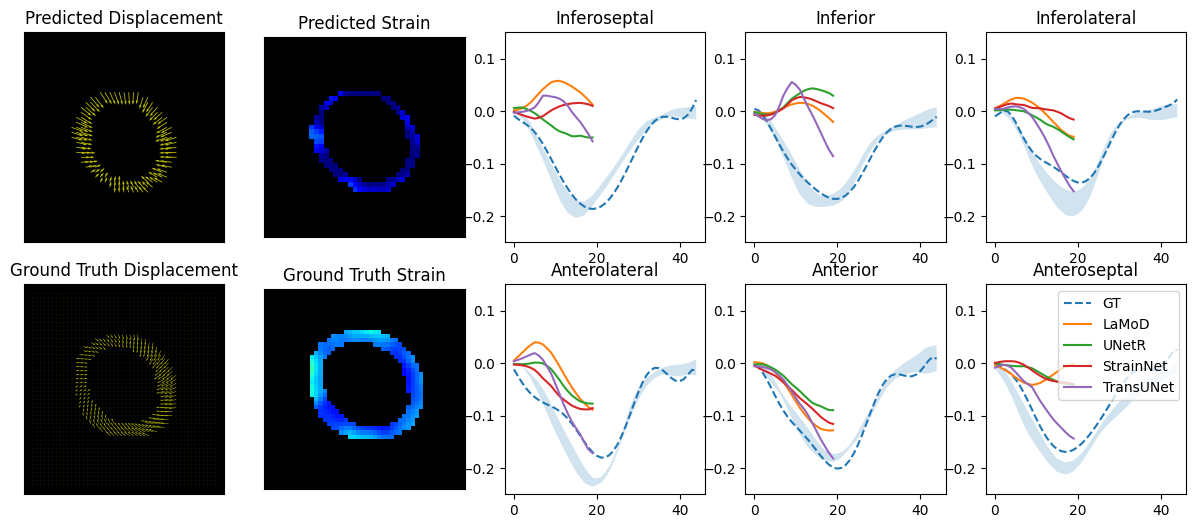

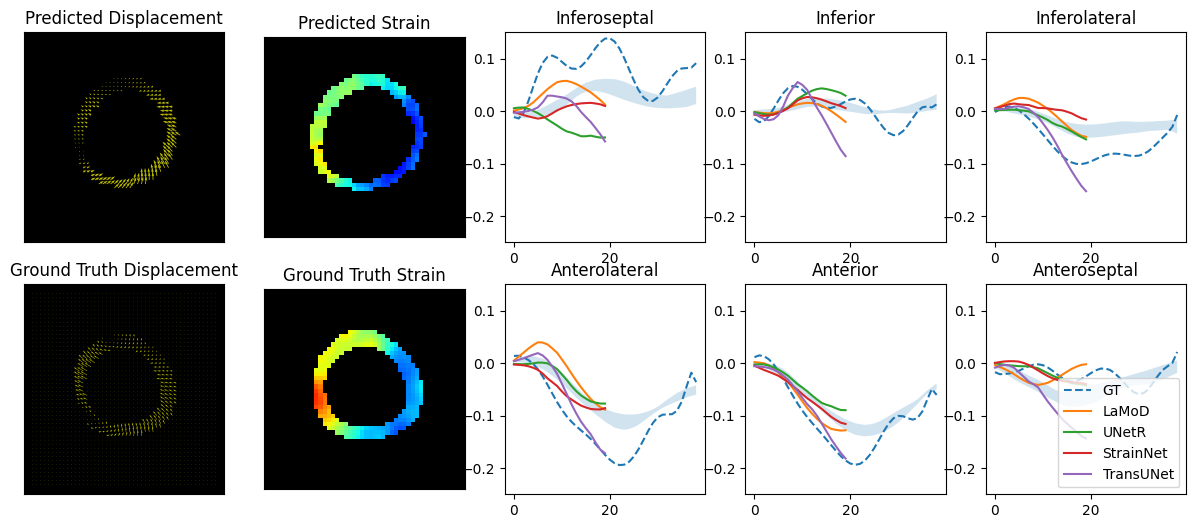

In [60]:
from copy import deepcopy
for preds_idx, preds in enumerate(cine_showcase_data_preds):
    
    pred_disps = [datum['disp_pred'] for datum in preds]
    # pred_disp_skipdiffusion = [datum['disp_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_disps = [datum['disp_GT'][...,:-1] for datum in preds]

    # datum_patient_id = test_DENSE_data[check_datum_idx]['patient_id']
    datum_ES_frame = 10
    # datum_ES_time = test_DENSE_data[check_datum_idx]['DENSE_frame_time_stamps'][datum_ES_frame]
    

    pred_disps_mean_X = np.mean([disp[0] for disp in pred_disps], axis=0)#*1.5
    pred_disps_mean_Y = np.mean([disp[1] for disp in pred_disps], axis=0)#*1.5

    pred_strains = [datum['strain_pred'] for datum in preds]
    pred_strain_mean = np.mean([strain for strain in pred_strains], axis=0)
    # pred_strain_mean = preds[0]['strain_pred']*1.5
    # pred_strain_skipdiffusion = [datum['strain_pred']*1.5 for datum in DENSE_showcase_data_skipdiffusion_preds[preds_idx]][0]
    gt_strain = preds[0]['strain_GT']

    fig, axs = plt.subplots(2, 5, figsize=(15, 6))
    # Predicted Displacements Field
    axs[0,0].quiver(
        pred_disps_mean_X[...,10]*preds[0]['mask_raw'].numpy(), 
        pred_disps_mean_Y[...,10]*preds[0]['mask_raw'].numpy(), 
        # zoom_img_with_nan(pred_disps_mean_X[...,10], 1.5), 
        # zoom_img_with_nan(pred_disps_mean_Y[...,10], 1.5), 
        color='y', 
        scale=1,
        width=0.004,
        scale_units='xy')
    axs[0,0].set_title('Predicted Displacement')
    axs[0,0].set_facecolor('black')
    if preds_idx == 0:
        axs[0,0].set_ylim(3, 45)
        axs[0,0].set_xlim(3, 45)
    # hide axis
    axs[0,0].set_xticks([])
    axs[0,0].set_yticks([])


    # GT Displacements Field
    axs[1,0].quiver(
        gt_disps[0][0,...,datum_ES_frame],
        gt_disps[0][1,...,datum_ES_frame],
        color='y',
        scale=1,
        scale_units='xy')
    axs[1,0].set_title('Ground Truth Displacement')
    axs[1,0].set_facecolor('black')
    axs[1,0].set_xticks([])
    axs[1,0].set_yticks([])

    # Predicted Strain Image
    pred_strain_mean_vis_frame = deepcopy(pred_strain_mean[...,datum_ES_frame])
    pred_strain_mean_vis_frame[preds[0]['mask_raw'].numpy()<0.5] = np.nan
    # axs[0,1].imshow(zoom_img_with_nan(pred_strain_mean[...,datum_ES_frame]*preds[0]['mask_raw'].numpy(), 1.2), cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0,1].imshow(pred_strain_mean_vis_frame, cmap='jet', vmin=-0.2, vmax=0.2)
    # axs[0,1].imshow(pred_strain_skipdiffusion[...,10], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[0,1].set_title('Predicted Strain')
    axs[0,1].set_facecolor('black')
    axs[0,1].invert_yaxis()
    axs[0,1].set_xticks([])
    axs[0,1].set_yticks([])
    if preds_idx == 0:
        axs[0,1].set_ylim(3, 45)
        axs[0,1].set_xlim(3, 45)
    # colorbar
    # cbar = fig.colorbar(axs[0,1].images[0], ax=axs[0,1])
    # cbar.set_label('Strain')

    # GT Strain Image
    axs[1,1].imshow(gt_strain[...,datum_ES_frame], cmap='jet', vmin=-0.2, vmax=0.2)
    axs[1,1].set_title('Ground Truth Strain')
    axs[1,1].set_facecolor('black')
    axs[1,1].invert_yaxis()
    axs[1,1].set_xticks([])
    axs[1,1].set_yticks([])
    # colorbar
    # cbar = fig.colorbar(axs[1,1].images[0], ax=axs[1,1])
    # cbar.set_label('Strain')

    # Strain curves
    n_sectors = 6
    # fig, axs = plt.subplots(2, n_sectors, figsize=(n_sectors*2, 5))
    # curr_cine_idx = cine_showcase_indices[preds_idx]
    curr_cine_idx = cine_showcase_indices[preds_idx]
    for sector_idx in range(n_sectors):
        row_idx = sector_idx // 3
        col_idx = sector_idx % 3
        sector_strain_curves_pred_mean = np.mean([pred['CCs6Resampled_pred'][sector_idx] for pred in preds], axis=0)
        sector_strain_curves_pred_std = np.std([pred['CCs6Resampled_pred'][sector_idx] for pred in preds], axis=0)

        sector_strain_curves_GT_mean = np.mean([pred['CCs6_GT'][sector_idx] for pred in preds], axis=0)
        # sector_strain_curves_GT_std = np.std([pred['CCs6_GT'][sector_idx] for pred in trial_data], axis=0)

        # axs[row_idx, col_idx+2].plot(sector_strain_curves_pred_mean, label='LaMoD')
        # axs[row_idx, col_idx+2].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        axs[row_idx, col_idx+2].plot(sector_strain_curves_GT_mean, label='GT', linestyle='--')
        # axs[0, sector_idx].fill_between(np.arange(len(sector_strain_curves_GT_mean)), sector_strain_curves_GT_mean - sector_strain_curves_GT_std, sector_strain_curves_GT_mean + sector_strain_curves_GT_std, alpha=0.2)

        # set the y-axis between -0.25 and 0.05
        axs[row_idx, col_idx+2].set_ylim([-0.25, 0.15])
        axs[row_idx, col_idx+2].set_title(f'{segment_names[sector_idx]}')

        # baseline predictions        
        strain_curve_LaMoD = data_recompute_strain_prev[curr_cine_idx]['MotionDecoder1x1_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_UNetR = data_recompute_strain_prev[curr_cine_idx]['UNetROri_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_StrainNet = data_recompute_strain_prev[curr_cine_idx]['StrainNetOri_cine_strain']['CCs6Resampled'][sector_idx, :-1]
        strain_curve_TransUNet = data_recompute_strain_transunet[curr_cine_idx]['TransUNetOri_cine_strain']['CCs6Resampled'][sector_idx, :-1]

        axs[row_idx, col_idx+2].plot(strain_curve_LaMoD, label='LaMoD')
        axs[row_idx, col_idx+2].fill_between(np.arange(len(sector_strain_curves_pred_mean)), sector_strain_curves_pred_mean - sector_strain_curves_pred_std, sector_strain_curves_pred_mean + sector_strain_curves_pred_std, alpha=0.2)
        axs[row_idx, col_idx+2].plot(strain_curve_UNetR, label='UNetR')
        axs[row_idx, col_idx+2].plot(strain_curve_StrainNet, label='StrainNet')
        axs[row_idx, col_idx+2].plot(strain_curve_TransUNet, label='TransUNet')

        if sector_idx == 5:
            axs[row_idx, col_idx+2].legend()


In [62]:
data_recompute_strain_prev[curr_cine_idx]['MotionDecoder1x1_cine_strain']['CCs6'].shape

(6, 19)

In [64]:
data_recompute_strain_prev[curr_cine_idx]['UNetROri_cine_strain']['CCs6Resampled'].shape

(6, 20)

In [26]:
data_recompute_strain_prev[0]['UNetROri_cine_strain']['CCs6Resampled'].shape

(6, 51)